In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Data Preprocessing

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [ ]:
np.max(x_train), np.min(x_train), np.mean(x_train)

(255, 0, 72.94035223214286)

In [ ]:
np.max(y_train), np.min(y_train)

(9, 0)

In [ ]:
label_names = {0:"T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat", 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot"}

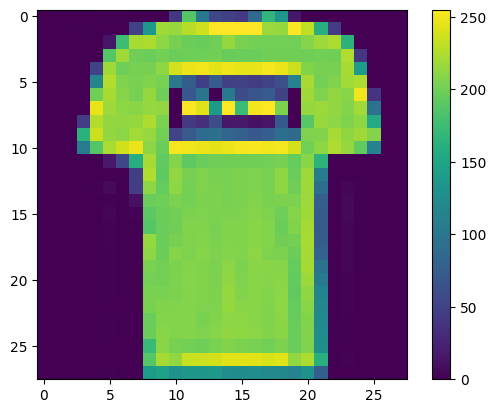

In [ ]:
# Data Exploration

plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

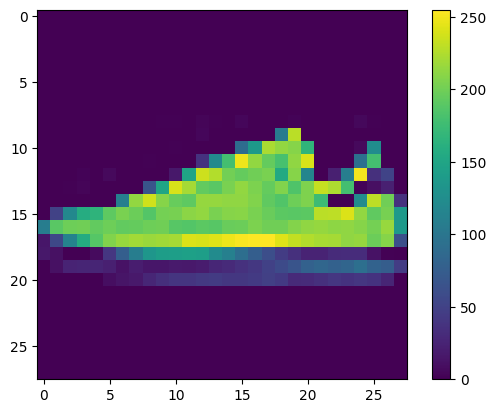

In [ ]:
# Data Exploration

plt.figure()
plt.imshow(x_train[6])
plt.colorbar()

In [ ]:
# Normalizing the Dataset

x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Flattening the Dataset

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [ ]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

# Building the Model

In [ ]:
model = tf.keras.models.Sequential() # sequence of layers.

In [ ]:
# Adding First Fully Connected Hidden Layer
  # FC = Fully Connected
  # FCNN = Fully Connected Neural Network

model.add(tf.keras.layers.Dense(units=128, activation="relu", input_shape=(784,)))
  # Units (no of neurons) = 128               (Node, unit, neuron... the same)
  # activation function = 784
  # input shape = 784

In [ ]:
# Adding Second Layer : Dropout

model.add(tf.keras.layers.Dropout(0.3))
  #Regularization technique, prevents overfitting

In [ ]:
# Adding the Output Layer
  # unit = 10
  # activation = softmax

model.add(tf.keras.layers.Dense(units=10, activation="softmax"))

In [ ]:
# Compiling the Model
  # Optimizer     : Minimize the loss function (we'll use adam)
  # Loss function : Acts as guide to optimize (we'şş use sparse_categorical_crossentropy)
  # Matrices      : sparse_categorical_accuracy

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.5548 - sparse_categorical_accuracy: 0.8032
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4174 - sparse_categorical_accuracy: 0.8493
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3857 - sparse_categorical_accuracy: 0.8587
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3653 - sparse_categorical_accuracy: 0.8653
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3522 - sparse_categorical_accuracy: 0.8702
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3419 - sparse_categorical_accuracy: 0.8731
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3342 - sparse_categorical_accuracy: 0.8762
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3232 - sparse_categorical_accuracy: 0.8803
Epoch 9/10
1875/1875 [========

# Model Evaluation and Prediction

In [ ]:
# Model Evaluation

test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3381 - sparse_categorical_accuracy: 0.8805


In [ ]:
# Model Prediction

y_pred = model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [ ]:
y_pred[0]

array([1.80286861e-07, 4.78161954e-12, 2.70873574e-10, 1.10943026e-10,
       5.01183806e-09, 3.30656325e-03, 2.07884341e-08, 6.38816319e-03,
       1.62231785e-07, 9.90304947e-01], dtype=float32)